<a href="https://colab.research.google.com/github/duytruong204/Project/blob/main/harmony_detection_ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

#harmony

In [ ]:
def plot(the_wheel):
    colorOfWheel = ['red','orange', 'yellow', '#80FF00', 'green', '#00ff7f', 'cyan', '#007FFF', 'blue', 'violet', 'magenta','#ff007f']
    j = 0
    for k in range(50,100):
        for i in range(0,12):
            t = np.linspace(j, j+ 1/12*2*math.pi, 100)
            a = k/100*np.cos(t+math.pi/2-math.pi/12)
            b = k/100*np.sin(t+math.pi/2-math.pi/12)
            plt.plot(a, b, color = colorOfWheel[i])
            j = j + 1/12 * 2*math.pi
    t = []
    angle = math.pi/2
    for thecolor in the_wheel:
      if thecolor == 1:
        t.append(angle)
      else:
        t.append(None)
      angle = angle + math.pi/6
    for t_i in t:
      if t_i != None:
        phi = np.linspace(0, 2*math.pi, 100)
        a = 1/30*np.cos(phi) + 80/100*np.cos(t_i)
        b = 1/30*np.sin(phi) + 80/100*np.sin(t_i)
        plt.plot(a, b, color = 'black')
    plt.axis("equal")
    plt.show()

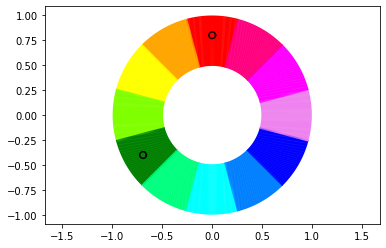

In [ ]:
wheel_color = wheel
plot(wheel_color)

In [ ]:
def take_list(data_list):
    list_color = []
    primarycolor = data_list[0]
    list_color.append(primarycolor)
    #############################################
    secondarycolor = []
    for i in range(len(data_list[1])):
      secondarycolor.append( data_list[1][i] )
    return list_color + secondarycolor

In [ ]:
# define functions
TOLERANCE = 1.0
def getMainColors(colors_arr, tolerance):
    if len(colors_arr) == 0:
        return
    colors_arr = np.array(colors_arr)
    chroma = colors_arr[:,1] * colors_arr[:,2]
    tolerance = tolerance
    print(chroma)
    cutoff = chroma.mean() - chroma.std() * tolerance
    to_remove = []
    print(cutoff)
    for i in range(len(chroma)):
        #print(hsv_colors[i,0]*360) #display hue degrees
        if chroma[i] < cutoff:
            to_remove.append(i)
            
    mainColors = np.delete(colors_arr, to_remove, axis=0)
    return mainColors

def colorsOnWheel(colors):
    # Outputs an array of presence of colors on the RGB color wheel up to tertiary colors (12-split)
    # Red=0,...,Green=4,...,Blue=8
    colors_arr = colors
    if len(colors_arr) == 0:
        return
    for i in range(len(colors_arr)):
      colors_arr[i] = colors_arr[i]/360
    hues = colors_arr
    wheel = [0]*12
    for i in range(len(hues)):
        for c in range(12):
            lb = c*1/12 - 1/24
            ub = c*1/12 + 1/24
            if lb < hues[i] < ub:
                wheel[c] = 1
        if hues[i] > 11/12: 
            # if red > 345 degrees
            wheel[0] = 1
    return wheel

In [ ]:
# get color harmony from mainColors
def getHarmony(wheelColors):
    # Get the corresponding colors on the RGB wheel from array of RGB colors
    w = wheelColors
    harmonies = np.array([monochromatic(w), complementary(w), splitComplementary(w), triad(w), square(w), analogous(w),DoublesplitComplementary(w),Brisefan(w), False]) * 1
    
    # If other color combinations
    if sum(w) > 1 and sum(harmonies)==0:
        harmonies[-1] = 1
    return harmonies
    
# Harmonies    
def monochromatic(wheelColors):
    return sum(wheelColors)==1

def complementary(wheelColors):#ok
    for curr in range(12):
        opp = (curr+6) % 12
        list_position = [curr, opp]
        if wheelColors[curr]==1 and wheelColors[opp]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def splitComplementary(wheelColors):
    for curr in range(12):
        opp_left = (curr+5) % 12
        opp_right = (curr+7) % 12
        list_position = [curr, opp_left, opp_right]
        if wheelColors[curr]==1 and wheelColors[opp_left]==1 and wheelColors[opp_right]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def triad(wheelColors):#ok
    for curr in range(12):
        left = (curr+4) % 12
        right = (curr+8) % 12
        list_position = [curr, right, left]
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def square(wheelColors):#ok
    for curr in range(12):
        left = (curr+3) % 12
        right = (curr+9) % 12
        opp = (curr+6) % 12
        list_position = [curr, left, right, opp]
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def analogous(wheelColors):
    for curr in range(12):#2 pies
        right = (curr+1) % 12
        list_position = [curr, right]
        if wheelColors[curr]==1 and wheelColors[right]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#3 pies
        right = (curr+1) % 12
        left = (curr+2) % 12
        list_position = [curr, right, left]
        if wheelColors[curr]==1 and wheelColors[right]==1 and wheelColors[left]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#4 pies
        right = (curr+1) % 12
        right_right = (curr+2) % 12
        left = (curr+3) % 12
        list_position = [curr, right, left,right_right]
        if wheelColors[curr]==1 and wheelColors[right]==1 and wheelColors[left]==1 and wheelColors[right_right]==1 and empty_color(wheelColors, list_position):
            return True  
    for curr in range(12):#5 pies
        right = (curr+1) % 12
        right_right = (curr+2) % 12
        left = (curr+3) % 12
        left_left = (curr+4) % 12
        list_position = [curr, right, left,right_right,left_left]
        if wheelColors[curr]==1 and wheelColors[right]==1 and wheelColors[left]==1 and wheelColors[right_right]==1 and empty_color(wheelColors, list_position):
            return True                    
    return False


def DoublesplitComplementary(wheelColors):
    for curr in range(12):
        currop = (curr+6) % 12
        second = (curr+2) % 12
        secondop = (curr+8) % 12
        right = (curr+1) % 12
        list_position = [curr, currop, second,secondop,right]
        if wheelColors[curr]==1 and wheelColors[currop]==1 and wheelColors[second]==1 and wheelColors[secondop]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def Brisefan(wheelColors):
    for curr in range(12):#3 separated pies
        first = (curr+2) % 12
        second = (curr+4) % 12
        list_position = [curr, first, second]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#3 pies
        first = (curr+2) % 12
        second = (curr+3) % 12
        list_position = [curr, first, second]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#3 pies
        first = (curr+1) % 12
        second = (curr+4) % 12
        list_position = [curr, first, second]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#4 pies
        first = (curr+2) % 12
        second = (curr+3) % 12
        third = (curr+4) % 12
        list_position = [curr, first, second, third]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and wheelColors[third]==1 and empty_color(wheelColors, list_position):
            return True
    return False
    for curr in range(12):#4 pies
        first = (curr+1) % 12
        second = (curr+3) % 12
        third = (curr+4) % 12
        list_position = [curr, first, second, third]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and wheelColors[third]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#4 pies
        first = (curr+1) % 12
        second = (curr+2) % 12
        third = (curr+4) % 12
        list_position = [curr, first, second, third]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and wheelColors[third]==1 and empty_color(wheelColors, list_position):
            return True
    for curr in range(12):#4 pies
        first = (curr+1) % 12
        second = (curr+3) % 12
        third = (curr+5) % 12
        list_position = [curr, first, second, third]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and wheelColors[third]==1 and empty_color(wheelColors, list_position):
            return True
    return False
    for curr in range(12):#4 pies
        first = (curr+1) % 12
        second = (curr+2) % 12
        third = (curr+5) % 12
        list_position = [curr, first, second, third]
        if wheelColors[curr]==1 and wheelColors[first]==1 and wheelColors[second]==1 and wheelColors[third]==1 and empty_color(wheelColors, list_position):
            return True
    return False


def empty_color(wheelColors,list_position):
    my_list = []
    for i in range(12):
        if not i in list_position:
            my_list.append(i)
    s = 0
    for j in my_list:
        if wheelColors[j]==1:
            r = 1
        else:
            r = 0
        s = s + r
    if s == 0:
        return True
    else:
        return False

def harmony(wheel):
    labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square",  "Analogous","DoublesplitComplementary","Brisefan", "Other"]
    harmony = getHarmony(wheel)
    for i in range(len(harmony)):
        if harmony[i]: 
            print(labels[i])

In [ ]:
def empty_color(wheelColors,list_position):
    my_list = []
    for i in range(12):
        if not i in list_position:
            my_list.append(i)
    s = 0
    for j in my_list:
        if wheelColors[j]==1:
            r = 1
        else:
            r = 0
        s = s + r
    if s == 0:
        return True
    else:
        return False


In [ ]:
# Display harmonies of test_img
def harmony_only(wheel):
    the_label = []
    labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square",  "Analogous","DoublesplitComplementary","Brisefan", "Other"]
    harmony = getHarmony(wheel)
    for i in range(len(harmony)):
        if harmony[i]: 
            the_label.append(labels[i])
    if len(the_label) != 1:
      return 'Other' 
    else:
      return the_label[0]

In [ ]:
a = [1,1,1,1,1,0,0,1,0,0,0,0]
b = [0,7]
empty_color(a,b)

False

In [ ]:
wheel = colorsOnWheel([350, 115])
wheel

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def harmony(wheel):
    labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square",  "Analogous","DoublesplitComplementary","Brisefan", "Other"]
    harmony = getHarmony(wheel)
    for i in range(len(harmony)):
        if harmony[i]: 
            print(labels[i])